In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Многие алгоритмы машинного обучения давно за нас написаны и лежат в своих библиотеках. Но для того, чтобы понимать, что как устроено, попробуем самостоятельно написать KNN.

Обычно такие массивные штуки пишутся при помощи объектно-ориентированного программирования (ООП). Если бы мы использовали ООП, мы бы создали отдельный класс, посвященный KNN. Так, например, в библиотеках машинного обучения KNN лежит в отдельном классе. Внутри этого класса лежат бы соответствующие функции, нужные для того, чтобы обучить модель и применить ее. Вообще ООП - удобный способ упорядочить и создать структуру внутри кода, но это совсем не обязательно делать, можно обойтись и без ООП!

Наш KNN все-таки будет разделен на несколько функций -- внутри каждой мы будем решать свою маленькую задачку.

Классически (в библиотеке scikit learn) модели описываются двумя функциями:

1. fit -- обучение модели на обучающей выборке
2. predict -- предсказание класса для нового объекта

У нас для удобства будет еще одна функция, вычисляющая расстояние между объектами ($\rho$)

### вычисление расстояния между объектами

$$\rho(x, y) = \sqrt{\sum_{i=1}^{n} (x-y)^2}$$

In [ ]:
def euclidian(x, y):
  a = x-y
  a = a**2
  a = a.sum()
  return a**0.5

проверим на примере из лекции:

In [ ]:
a = np.array([1, 2])
b = np.array([4, 6])
assert euclidian(a, b) == 5.0

### выдача самого популярного класса

$$ a(x) =  \underset{y \in \mathbb{Y}}{argmax} \sum^{k}_{i = 1} [y_i = y] $$

In [ ]:
def prediction(y):
  # определим наше множество Y
  set_y = list(set(y))
  # сгенерируем суммы для всех возможных y из множества игреков
  sums = []
  for i in set_y:
      sums.append(len(y[y == i]))
  return int(set_y[np.argmax(np.array(sums))])

In [ ]:
y = np.array([0, 0, 1, 3, 2, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3])
prediction(y)

3

### обучение

In [ ]:
def fit(X, y, k):
  return (X, y, k)

### предсказание

In [ ]:
def predict(all_x, train):
  # сперва считаем расстояния!
  X, y, k = train
  predictions = []
  for x in all_x:
    distance = []
    for i in X:
      distance.append(euclidian(i, x))
    # теперь выбираем k самых маленьких расстояний и смотрим, каким объектам они соответствуют и каким классам
    smallest = np.argsort(np.array(distance))[:k]
    k_classes = y[smallest]
    # собираем метки которые у нас вообще есть
    predictions.append(prediction(k_classes))
  return predictions

In [ ]:
import numpy as np

In [ ]:
k = 2
distance = np.array([5, 1, 3, 2])
smallest = np.argsort(distance)
smallest

array([1, 3, 2, 0])

In [ ]:
distance[smallest]

array([1, 2, 3, 5])

In [ ]:
0, 1, 2, 3

In [ ]:
smallest[:k]

array([1, 3])

## использование модели!!

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
X = iris.data
y = iris.target
names = iris.target_names

In [ ]:
values = len(y)

In [ ]:
shuffle = np.arange(values)
np.random.shuffle(shuffle)

In [ ]:
shuffle

array([ 32,  55,  75,  25, 141,  71,  99,  12,  38, 108,  41,   8,   9,
        35,  87,  83,  45,  93,  33, 113,  26, 102,  49, 109,  88,  48,
       136,  97,  37, 148, 146, 121,  67, 143,  56,  76,  90,  28, 129,
        21,  70, 100,  23,   7, 147, 132,   2,  24,  14,  53, 140,  39,
       127,  59,  64,  22,  30,  13,  19, 122, 125, 103, 126,  91, 142,
       120,  20,  66,  36, 119,  52,   1,  27,  73,  44, 104,  96,  42,
        34, 133,  94, 124,  60,  57,  84, 107,  51,  54, 139,   6,   4,
        18,  17,  89,  69, 105,   3, 101,  50, 118,  46, 112,  62, 134,
       117, 114,  72, 116,  15,  78,  29, 144, 135, 111,  92, 145, 131,
        61, 110,  86,  16,  80,  81,  31,  68,  40, 130, 128, 106, 123,
        74,  65,  10,  95, 137, 138,  79,  43,   5,  77,  47,  11,  82,
        98,  85, 149,  58, 115,  63,   0])

In [ ]:
divider = int(values*0.75)

In [ ]:
X = X[shuffle]
y = y[shuffle]
X_train = X[:divider]
y_train = y[:divider]
X_test = X[divider:]
y_test = y[divider:]

In [ ]:
pred = predict(X_test, fit(X_train, y_train, 5))

In [ ]:
print(pred)

[2, 2, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0, 1, 0, 2, 2, 1, 2, 1, 1, 0, 1, 2, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 2, 1, 2, 1, 0]


In [ ]:
y_test

array([2, 2, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0, 1, 0, 2, 2, 2, 2, 1, 1, 0, 1,
       2, 2, 1, 0, 0, 1, 0, 0, 1, 1, 1, 2, 1, 2, 1, 0])

In [ ]:
def accuracy(prediction, y_test):
  length = len(prediction)
  summ = 0
  for i in range(length):
    if prediction[i] == y_test[i]:
      summ += 1
  return summ/length

In [ ]:
accuracy(pred, y_test)

0.9473684210526315

## попробуем разное количество соседей и посмотрим на качество, которое мы будем получать

In [ ]:
train_accuracies = []
test_accuracies = []
limits = range(1, 30)

for k in limits:
    pred = predict(X_test, fit(X_train, y_train, k))
    test_accuracies.append(accuracy(pred, y_test))
    pred = predict(X_train, fit(X_train, y_train, k))
    train_accuracies.append(accuracy(pred, y_train))

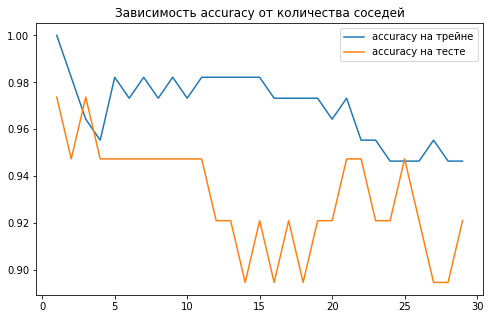

In [ ]:
plt.rcParams["figure.figsize"] = (8,5)
plt.plot(list(limits), train_accuracies, label = 'accuracy на трейне')
plt.plot(list(limits), test_accuracies, label = 'accuracy на тесте')
plt.legend()
plt.title('Зависимость accuracy от количества соседей')
pass

# стандартные библиотеки

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
data = load_digits()
X = data.images
y = data.target

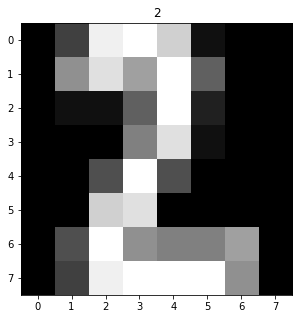

In [ ]:
n = np.random.randint(0, len(y))
plt.imshow(X[n], cmap = 'gray')
plt.title(y[n])
pass

In [ ]:
X = X.reshape(X.shape[0], -1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.9866666666666667

n_neighborsint, default=5
Number of neighbors to use by default for kneighbors queries.

weights{‘uniform’, ‘distance’} or callable, default=’uniform’
Weight function used in prediction. Possible values:

‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

[callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.

p int, default=2
Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

n_jobs int, default=None
The number of parallel jobs to run for neighbors search. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details. Doesn’t affect fit method.

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 40, weights = 'distance', p = 3, n_jobs = -1)

In [ ]:
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.9688888888888889

In [ ]:
from sklearn.model_selection import GridSearchCV


params = [{'n_neighbors': [3, 10, 30],
         'weights': ['uniform', 'distance'],
         'p': [1, 2, 3],
          'n_jobs': [-1]}]

gs_knn = GridSearchCV(KNeighborsClassifier(),
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)

gs_knn.fit(X_train, y_train)
gs_knn.best_params_

{'n_jobs': -1, 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}

In [ ]:
# find best model score
gs_knn.score(X_train, y_train)

1.0